# House Price Prediction
## 1. Domain Understanding

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading data
#checking the size to get idea the size of data
df = pd.read_csv('house_pricing.csv')
print(df.shape)
df.head()

(13320, 9)


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


Given data of house. The objective is to build model which can predict the price of data with given input.

## 2. Data Exploration and Collection

In [3]:
#checking the type of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


Availability and society will be dropped. Size is not uniform, need to be converted. total_sqft needs to be converted to numeric value.

## 3. Data Cleaning

In [4]:
#dropping unimportant features
df = df.drop(['availability','society'],axis=1)
df.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [5]:
df.isnull().sum()

area_type       0
location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [6]:
df['size'].fillna('0 BHK',inplace=True)

In [7]:
df['bedroom'] = df['size'].apply(lambda x: int(x.split(' ')[0]))
df.head()

,area_type,location,size,total_sqft,bath,balcony,price,bedroom
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [8]:
df['balcony'].fillna(df.balcony.median(),inplace=True)
df['bath'].fillna(df.bath.median(),inplace=True)

In [9]:
df.dropna(inplace=True)

In [10]:
#some of values are error, need to be cleaned
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [11]:
#define function to convert total_sqft to float
def sqft_to_float(x):
    token = x.split('-')
    if len(token) == 2:
        return(float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [12]:
df['total_sqft'] = df['total_sqft'].apply(sqft_to_float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13319 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   13319 non-null  object 
 1   location    13319 non-null  object 
 2   size        13319 non-null  object 
 3   total_sqft  13273 non-null  float64
 4   bath        13319 non-null  float64
 5   balcony     13319 non-null  float64
 6   price       13319 non-null  float64
 7   bedroom     13319 non-null  int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 936.5+ KB


In [13]:
df.isnull().sum()

area_type      0
location       0
size           0
total_sqft    46
bath           0
balcony        0
price          0
bedroom        0
dtype: int64

In [14]:
#to drop Sqmeterfeet,yards in total_sqft
df.dropna(inplace=True)
df.shape

(13273, 8)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13273 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   13273 non-null  object 
 1   location    13273 non-null  object 
 2   size        13273 non-null  object 
 3   total_sqft  13273 non-null  float64
 4   bath        13273 non-null  float64
 5   balcony     13273 non-null  float64
 6   price       13273 non-null  float64
 7   bedroom     13273 non-null  int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 933.3+ KB


In [16]:
#to delete extra space after character in location column in order to get data clean
df.location = df.location.apply(lambda x: x.strip())

In [17]:
len(df.location.unique())

1288

In [18]:
#there are 1288 unique values of location in 13273 total data. statistically, some of them would be having low counts
location_count = df.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_count

location
Whitefield              539
Sarjapur  Road          399
Electronic City         304
Kanakpura Road          271
Thanisandra             236
                       ... 
Kumbhena Agrahara         1
Kudlu Village,            1
Konappana Agrahara        1
Kodanda Reddy Layout      1
1 Annasandrapalya         1
Name: location, Length: 1288, dtype: int64

In [19]:
#try how many values which have count lower than 10
len(location_count[location_count<10])

1034

In [20]:
#changing it to Other to reduce dimension
df['location'] = df['location'].apply(lambda x: 'Other' if x in location_count[location_count<10] else x)
len(df.location.unique())

255

## 4. Feature Engineering

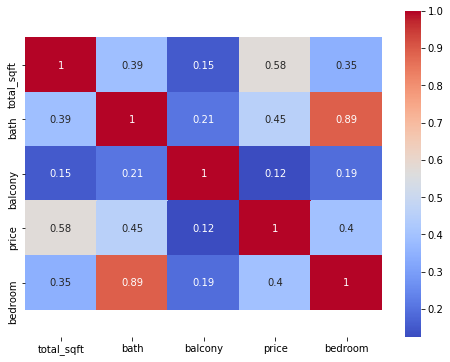

In [21]:
#check linear correlation
cor=df.corr()
plt.figure(figsize=(8,6))
ax=sns.heatmap(cor,annot=True,cmap='coolwarm')
bot,top = ax.get_ylim()
ax.set_ylim(bot+0.5, top-0.5)
plt.show()

Numerical values have quite good linear correlation to price

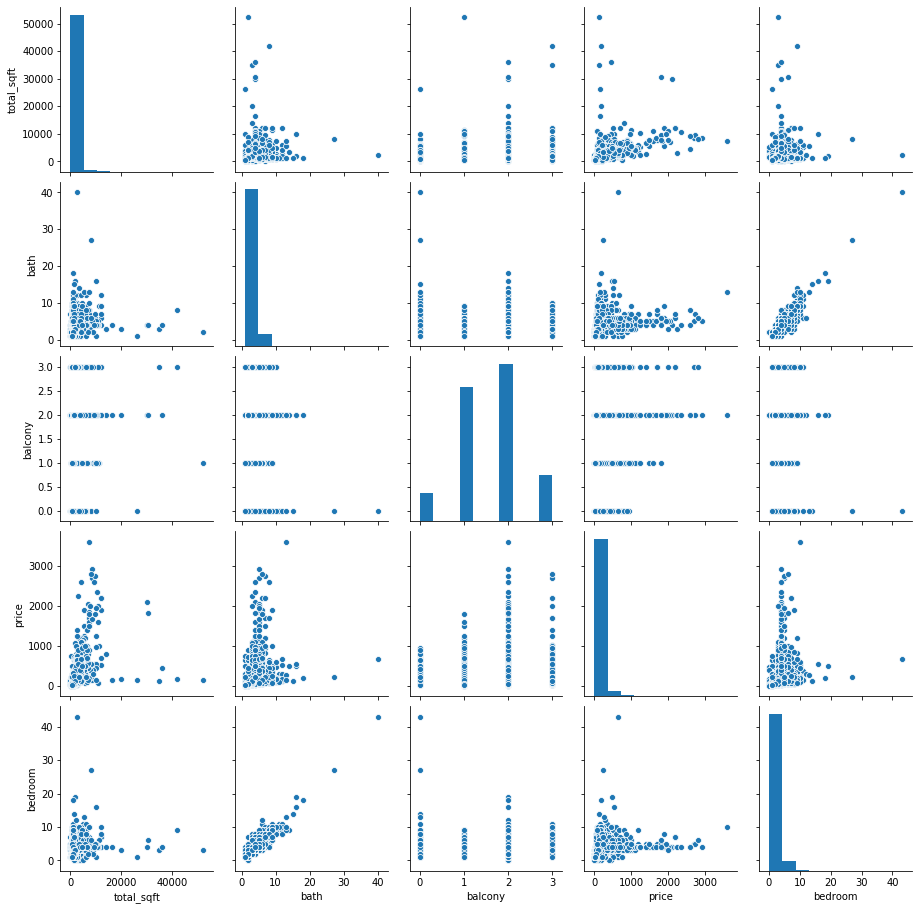

In [22]:
sns.pairplot(df)
plt.show()

total_sqft, bath, and bedroom seem to have linear correlation pattern with price with outliers. These outliers need to be removed. 

In [23]:
#removing outliers in total_sqft
df1 = df[df['total_sqft']<df['total_sqft'].quantile(0.998)]
print(df.shape)
print(df1.shape)

(13273, 8)
(13246, 8)


In [24]:
print(df1.describe())
print(df.skew())

         total_sqft          bath       balcony         price       bedroom
count  13246.000000  13246.000000  13246.000000  13246.000000  13246.000000
mean    1525.950305      2.682395      1.604107    110.718768      2.794579
std      840.863428      1.325102      0.802409    139.502012      1.285164
min        1.000000      1.000000      0.000000      8.000000      0.000000
25%     1100.000000      2.000000      1.000000     50.000000      2.000000
50%     1275.000000      2.000000      2.000000     71.565000      3.000000
75%     1675.000000      3.000000      2.000000    120.000000      3.000000
max     9600.000000     40.000000      3.000000   3600.000000     43.000000
total_sqft    15.266770
bath           4.259791
balcony       -0.058214
price          8.074917
bedroom        4.808844
dtype: float64


In [25]:
#removing outliers in bath
df2 = df1[df1['bath']<25]
print(df1.shape)
print(df2.shape)

(13246, 8)
(13244, 8)


In [26]:
#removing outliers in bedroom
df3 = df2[df2['bedroom']<16]
print(df2.shape)
print(df3.shape)

(13244, 8)
(13242, 8)


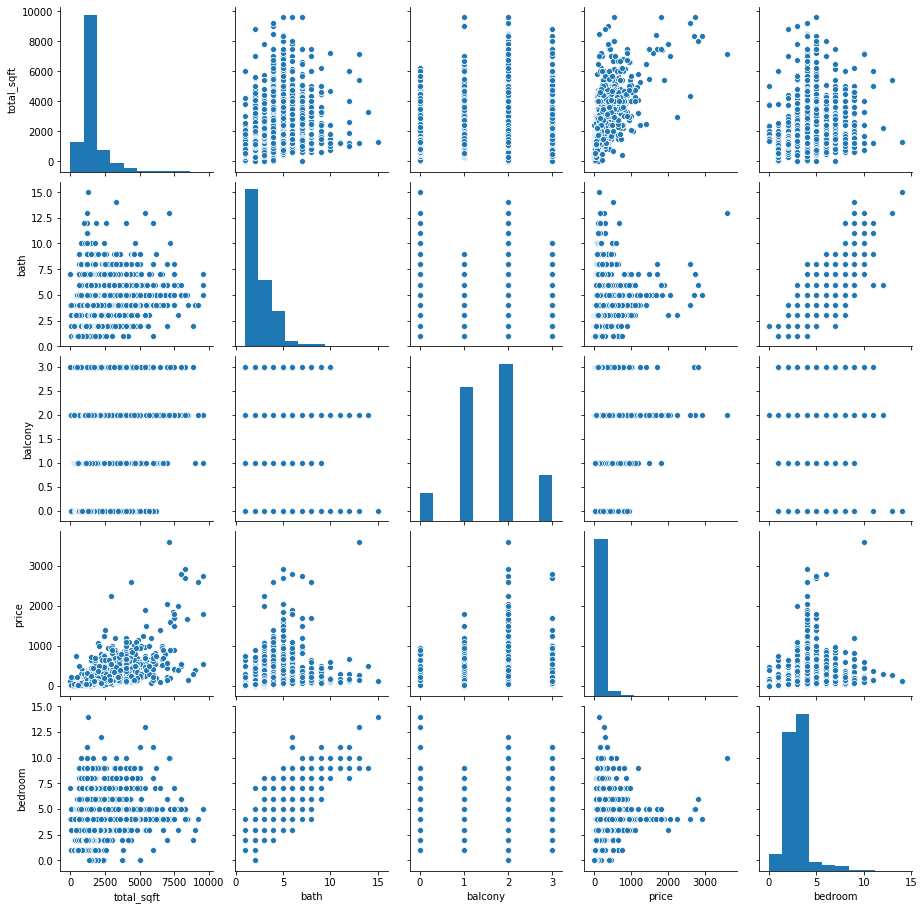

In [27]:
sns.pairplot(df3)
plt.show()

In [28]:
#usually we get information from business: total_sqft/bedroom has to be higher than or equal to 300 
df3[df3.total_sqft/df3.bedroom<300].head()

,area_type,location,size,total_sqft,bath,balcony,price,bedroom
9,Plot Area,Other,6 Bedroom,1020.0,6.0,2.0,370.0,6
45,Plot Area,HSR Layout,8 Bedroom,600.0,9.0,2.0,200.0,8
58,Plot Area,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.0,6
68,Plot Area,Devarachikkanahalli,8 Bedroom,1350.0,7.0,0.0,85.0,8
70,Plot Area,Other,3 Bedroom,500.0,3.0,2.0,100.0,3


In [29]:
#all of total_sqft/bedroom<300 are considered as outliers
#removing outliers
df3 = df3[~(df3.total_sqft/df3.bedroom<300)]
df3.shape

(12502, 8)

In [30]:
df3.head()

,area_type,location,size,total_sqft,bath,balcony,price,bedroom
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [31]:
df3.drop('size',axis=1,inplace=True)
df3.columns

Index(['area_type', 'location', 'total_sqft', 'bath', 'balcony', 'price',
       'bedroom'],
      dtype='object')

In [32]:
df = df3.copy()
df.shape

(12502, 7)

In [33]:
num=['total_sqft', 'bath', 'balcony','bedroom']
cat=['area_type','location']

In [34]:
#Anova analysis to check the importance of numerical features in correlatin with price
x = df[num]
y = df['price']

from sklearn.feature_selection import f_regression
fvalue,pval = f_regression(x,y)
for i in range(len(x.columns)):
    print(x.columns[i],pval[i]) 

total_sqft 0.0
bath 0.0
balcony 2.5495442922074713e-44
bedroom 0.0


Assuming business confidence is 5%. All of numerical features are important because pvalue is lower than 5%.

In [35]:
#chi square analysis to check the importance of categorical features in correlation with price
#decoding string type categorical features
xcat = df[cat]
y=y.astype('int')
from sklearn.preprocessing import LabelEncoder
xcat['area_type']= LabelEncoder().fit_transform(xcat['area_type'])
xcat['location']= LabelEncoder().fit_transform(xcat['location'])

#running chi square analysis
from sklearn.feature_selection import chi2
cval,pval = chi2(xcat,y)
for i in range(len(cat)):
    print(cat[i],' ',pval[i])

C:\Users\Juanda\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Juanda\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


area_type   0.5000388662927324
location   0.0


Assuming business confidence is 5%. area_type is unimportant for its pvalue is higher than 5%.

In [36]:
#dropping unimportant features
x= df.drop(['area_type', 'price'],axis=1)
y=df['price']

In [37]:
x.head()

,location,total_sqft,bath,balcony,bedroom
0,Electronic City Phase II,1056.0,2.0,1.0,2
1,Chikka Tirupathi,2600.0,5.0,3.0,4
2,Uttarahalli,1440.0,2.0,3.0,3
3,Lingadheeranahalli,1521.0,3.0,1.0,3
4,Kothanur,1200.0,2.0,1.0,2


In [38]:
dummies = pd.get_dummies(x.location)
dummies

,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
13316,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13317,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13318,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
x2 = pd.concat([x,dummies.drop('Other',axis='columns')],axis='columns')
x2.head()

,location,total_sqft,bath,balcony,bedroom,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Electronic City Phase II,1056.0,2.0,1.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Chikka Tirupathi,2600.0,5.0,3.0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Uttarahalli,1440.0,2.0,3.0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Lingadheeranahalli,1521.0,3.0,1.0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Kothanur,1200.0,2.0,1.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
x2 = x2.drop('location',axis=1)
x2.head()

,total_sqft,bath,balcony,bedroom,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2.0,1.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2600.0,5.0,3.0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,3.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,1.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,1.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 5. Preprocessing of Data

In [41]:
#splitting test and train data
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x2,y,test_size=0.2, random_state=5)

## 6. Apply Machine Learning Algorithm

In [42]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## 7. Performance Analysis

In [43]:
from sklearn.metrics import r2_score
print(r2_score(ytrain,model.predict(xtrain)))
print(r2_score(ytest,model.predict(xtest)))

0.5911663323043377
0.6552549675773636


In [44]:
#train decision tree machine 
from sklearn.tree import DecisionTreeRegressor
model2 = DecisionTreeRegressor(criterion="mse",max_depth=20,min_samples_leaf=15,min_samples_split=15)
model2.fit(xtrain,ytrain)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=20,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=15, min_samples_split=15,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [45]:
from sklearn.metrics import r2_score
print(r2_score(ytrain,model2.predict(xtrain)))
print(r2_score(ytest,model2.predict(xtest)))

0.6236605207356387
0.6358691678655062
